# Imports

In [1]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your mission: convert each string variable into datetime objects

In [4]:
var1 = '2018-01-04'
print(type(var1))
print(var1)

<class 'str'>
2018-01-04


In [5]:
var_date = datetime.strptime(var1, '%Y-%m-%d')
print(type(var_date))
print(var_date)

<class 'datetime.datetime'>
2018-01-04 00:00:00


In [8]:
# It's up to you :
var_date = datetime.strptime('2018-01-04', '%Y-%m-%d')

In [16]:
var2 = '14/02/2019'
var_date2 = datetime.strptime(var2, '%d/%m/%Y')
print(var_date2)


2019-02-14 00:00:00


In [18]:
var3 = '14 03 20'
# It's up to you :
var_date3 = datetime.strptime(var3, '%d %m %y')
print(var_date3)

2020-03-14 00:00:00


In [20]:
var4 = '14/02/2019 21:30'
# It's up to you :
var_date4 = datetime.strptime(var4, '%d/%m/%Y %H:%M')
print(var_date4)


2019-02-14 21:30:00


In [46]:
var5 = '2018-01-04 at 18 hours and 48 min'

# Convertir la chaîne en objet datetime
date_and_time = var5.split(' at ')
date_str, time_str = date_and_time[0], date_and_time[1]

date_parts = [int(part) for part in date_str.split('-') if part.isdigit()]
time_parts = [int(part) for part in time_str.split() if part.isdigit()]

#les parties numériques présentes
year, month, day = date_parts
hour, minute = time_parts[:2]

base_date = datetime(year, month, day)
adjusted_date = base_date + timedelta(hours=hour, minutes=minute)


formatted_date = adjusted_date.strftime('%Y-%m-%d at %H hours and %M min')
print(formatted_date)
print(type(adjusted_date))


2018-01-04 at 18 hours and 48 min
<class 'datetime.datetime'>


# Your mission: convert the datetime object into string with precise format

In [29]:
var_date = datetime.strptime('2020-02-15 20:05', '%Y-%m-%d %H:%M')
print(var_date)
formatted_date = var_date.strftime('%Y-%m-%d %H:%M')
print(type(formatted_date))
print(formatted_date)

2020-02-15 20:05:00
<class 'str'>
2020-02-15 20:05


In [30]:
# We would like to print this format : 15/02/2020
formatted_date = var_date.strftime('%d/%m/%Y')
print(formatted_date)


15/02/2020


In [32]:
# We would like to print this format : 15-02-2020
formatted_date = var_date.strftime('%d-%m-%Y')
print(formatted_date)


15-02-2020


In [33]:
# We would like to print this format : 15/02
formatted_date = var_date.strftime('%d/%m')
print(formatted_date)


15/02


In [35]:
# We would like to print this format : 2020-02
formatted_date = var_date.strftime('%Y-%m')
print(formatted_date)


2020-02


In [37]:
# We would like to print this format : 2020-02-15 at 20:05
formatted_date = var_date.strftime('%Y-%m-%d at %H:%M' )
print(formatted_date)


2020-02-15 at 20:05


# Your mission is to determine which date it was / it will be

In [50]:
# what month will it be in 7 weeks ?

# obtenir la date actuelle
current_date = datetime.now()

# calcule de la date dans 7 semaines à partir de maintenant
future_date = current_date + timedelta(weeks=7)

# %B c'est un format lié a .strf qui peut afficher le nom du mois en entier
print("Current Date:", current_date.strftime("%B"))
print("Future Date in 7 weeks:", future_date.strftime("%B"))


Current Date: October
Future Date in 7 weeks: December


In [51]:
# what day of the week will it be in 3 days ?
current_date = datetime.now()

future_date = current_date + timedelta(days=3)

day_of_week = future_date.strftime("%A")

print("Current date is: ", current_date.strftime("%A"))
print("Future day in 3 days will be: " , day_of_week)


Current date is:  Monday
Future day in 3 days will be:  Thursday


In [55]:
# what hour will it be in 100 hours ?
current_datetime = datetime.now()

future_datetime = current_datetime + timedelta(hours=100)

future_hour = future_datetime.hour
future_minute = future_datetime.minute

print("Current time is: ",current_datetime.strftime("%H:%M"))
print("Future time in 100 hours will be: {:02d}:{:02d}".format(future_hour, future_minute))


Current time is:  08:59
Future time in 100 hours will be: 12:59


In [56]:
# what date was 30 days ago ?
current_date = datetime.now()

date_30_days_ago = current_date - timedelta(days=30)

print("Date 30 days ago was: ",date_30_days_ago.strftime("%Y-%m-%d"))


Date 30 days ago was:  2023-09-23


In [57]:
# what date was 30 weeks ago ?
current_date = datetime.now()

date_30_weeks_ago = current_date - timedelta(weeks=30)

print("Date 30 weeks ago was: ",date_30_weeks_ago.strftime("%Y-%m-%d"))


Date 30 weeks ago was:  2023-03-27


# With Pandas
"DATE" column has only string values. On a chart, the X-axis is not well displayed.

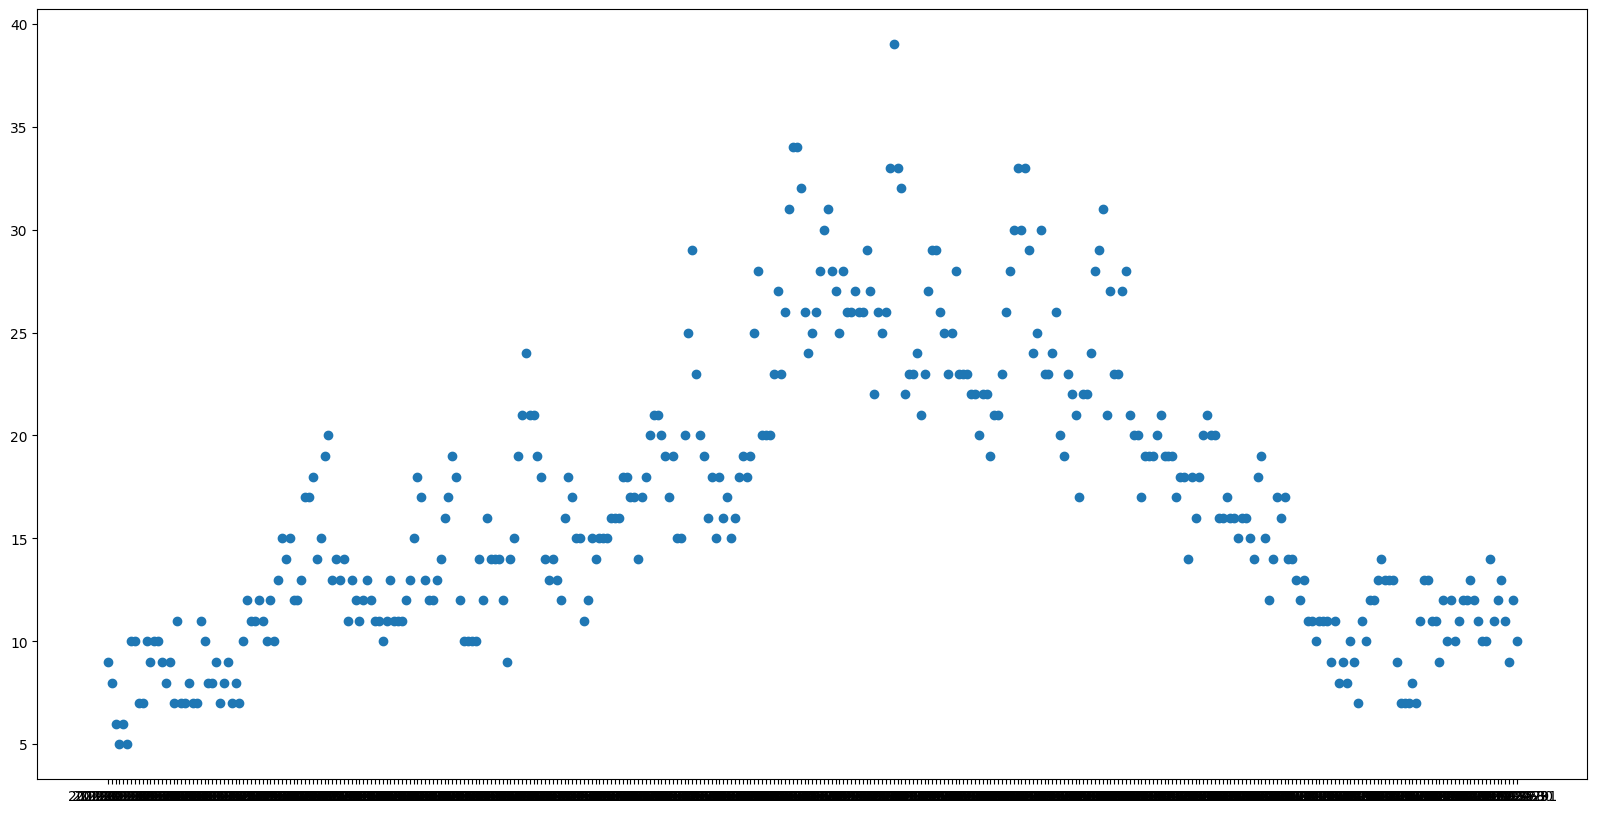

In [58]:
# Please run this cell without modification:
df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv")
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=df['DATE'],
           y=df['MAX_TEMPERATURE_C'])
fig.show()

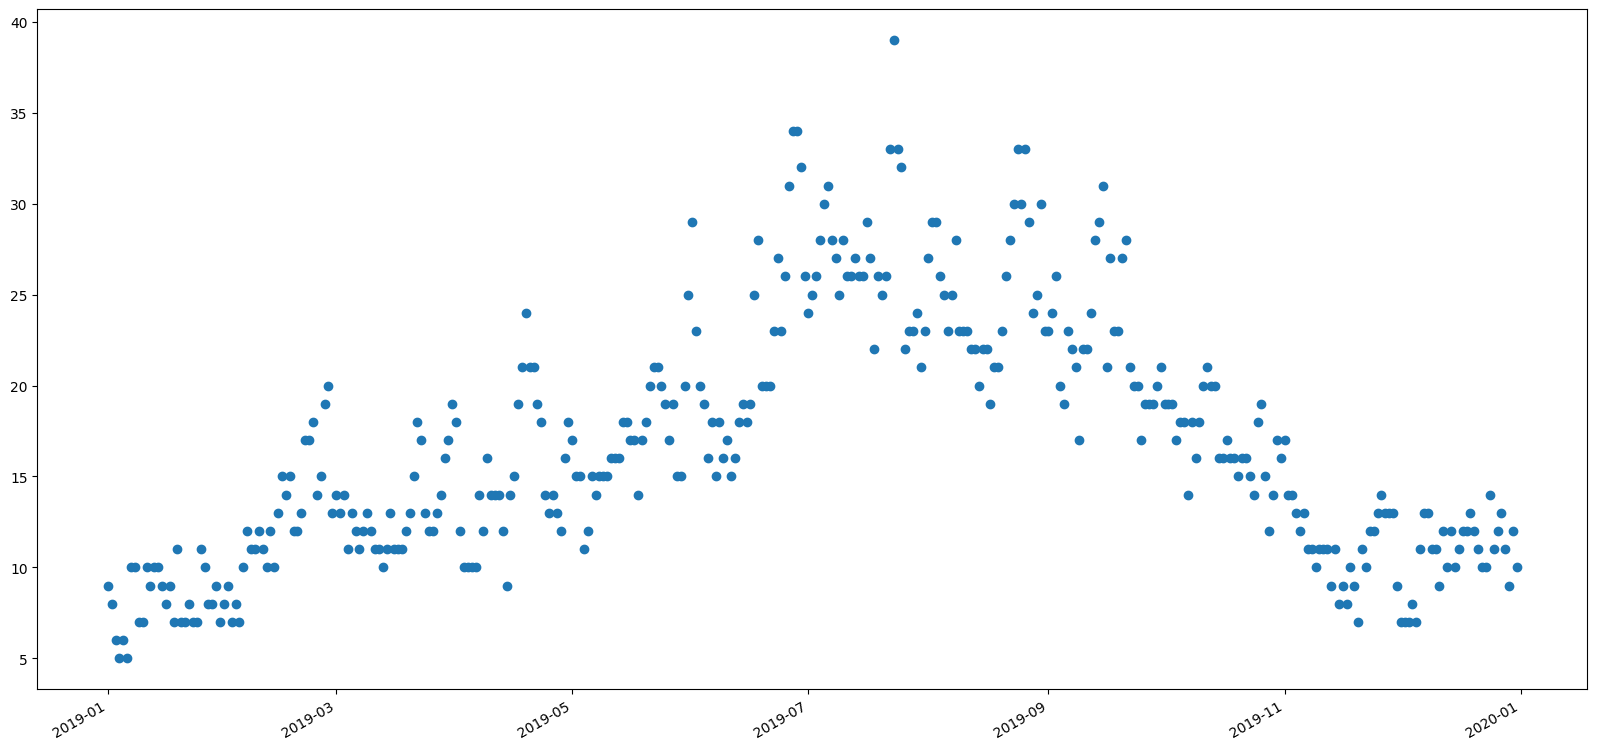

In [61]:
# Convert the "DATE" column into a datetime format, then display the same chart. Are ticks on X-axis better printed ?
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv")

# conversion de la colone date au format datetime
df['DATE'] = pd.to_datetime(df['DATE'])


fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=df['DATE'], y=df['MAX_TEMPERATURE_C'])


fig.autofmt_xdate()  # auto format du label date pour une meilleur lisibilité
plt.show()


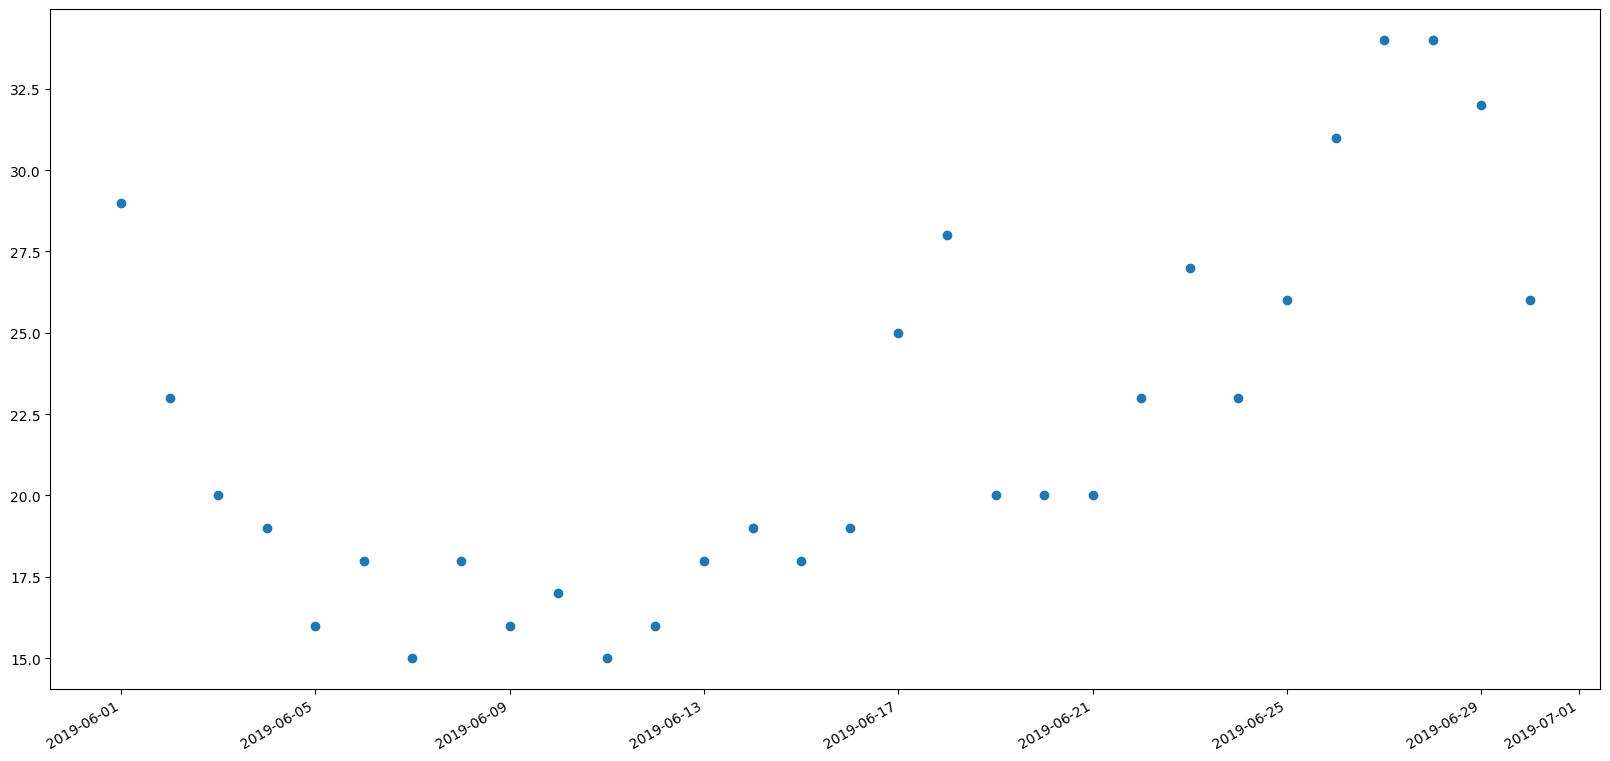

In [62]:
# Display only rows for the month of June
df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv")

df['DATE'] = pd.to_datetime(df['DATE'])
df_june = df[df['DATE'].dt.month == 6]

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=df_june['DATE'], y=df_june['MAX_TEMPERATURE_C'])

fig.autofmt_xdate()

plt.show()

